# implementing Simple Chatbot using LangGraph

In [2]:
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict
from typing import Annotated

In [8]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [6]:
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq
load_dotenv()
api_key = os.getenv('GROQ_API_KEY')
model_client = ChatGroq(model='gemma2-9b-it',api_key=api_key,max_completion_tokens=20)
model_client.invoke("hello")

c:\Users\ADMIN\Desktop\Langchain_Langraph\.venv\Lib\site-packages\pydantic\main.py:253: UserWarning: WARNING! max_completion_tokens is not default parameter.
                    max_completion_tokens was transferred to model_kwargs.
                    Please confirm that max_completion_tokens is what you intended.
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)


AIMessage(content='Hello! 👋\n\nWhat can I do for you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 10, 'total_tokens': 26, 'completion_time': 0.029090909, 'prompt_time': 0.00117339, 'queue_time': 0.250681805, 'total_time': 0.030264299}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--def83bb2-cc42-4f5d-b018-32e13b0efafb-0', usage_metadata={'input_tokens': 10, 'output_tokens': 16, 'total_tokens': 26})

### we will start creating with nodes

In [9]:
def chatbot(state:State):
    return {'messages':[model_client.invoke(state['messages'])]}


In [10]:
graph  = StateGraph(State)

graph.add_node('Superbot',chatbot)
graph.add_edge(START,'Superbot')
graph.add_edge('Superbot',END)




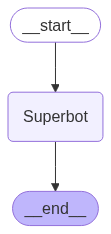

In [11]:
graph_builder = graph.compile()

from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

### Invocation

In [12]:
graph_builder.invoke({'messages':'Hi my name is ravi'})


{'messages': [HumanMessage(content='Hi my name is ravi', additional_kwargs={}, response_metadata={}, id='f7335bd4-3823-4e82-9d3f-8e380e3053c0'),
  AIMessage(content='Hi Ravi, nice to meet you! 👋\n\nWhat can I do for you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 14, 'total_tokens': 34, 'completion_time': 0.036363636, 'prompt_time': 0.00124519, 'queue_time': 0.245598507, 'total_time': 0.037608826}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'length', 'logprobs': None}, id='run--176a66dd-988c-4f20-ac09-f715d50cddc6-0', usage_metadata={'input_tokens': 14, 'output_tokens': 20, 'total_tokens': 34})]}

### Streaming the Responses

In [17]:
for event in graph_builder.stream({'messages':'i am Software Engineer'},stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='i am Software Engineer', additional_kwargs={}, response_metadata={}, id='d10966f9-092f-4a8e-a285-d4df880ba39c')]}
{'messages': [HumanMessage(content='i am Software Engineer', additional_kwargs={}, response_metadata={}, id='d10966f9-092f-4a8e-a285-d4df880ba39c'), AIMessage(content="That's awesome! \n\nIt's great to meet another software engineer. \n\nWhat", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 13, 'total_tokens': 33, 'completion_time': 0.036363636, 'prompt_time': 0.00163602, 'queue_time': 0.815613745, 'total_time': 0.037999656}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'length', 'logprobs': None}, id='run--0ed3ed45-3d0a-40ac-8e6a-02cf02ab6b66-0', usage_metadata={'input_tokens': 13, 'output_tokens': 20, 'total_tokens': 33})]}


In [18]:
for event in graph_builder.stream({'messages':'i am Software Engineer'},stream_mode="updates"):
    print(event)

{'Superbot': {'messages': [AIMessage(content="That's awesome! \n\nWhat kind of software engineering do you specialize in?  \n\nI", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 13, 'total_tokens': 33, 'completion_time': 0.036363636, 'prompt_time': 0.00157844, 'queue_time': 0.31892172, 'total_time': 0.037942076}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'length', 'logprobs': None}, id='run--adabebce-c0c5-4568-b45b-85a062d4a82f-0', usage_metadata={'input_tokens': 13, 'output_tokens': 20, 'total_tokens': 33})]}}
